# Actividad Evaluable: Mapas de calor y boxplots
---
Integrantes:
- Jorge Angel Delgado Morales (A01551955)
- Juan Carlos Ferrer Echeverría (A01734794)
- Diego García Rueda (A01735217)


#### Importando pandas y matplotlib, posteriormente leyendo la información

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("ulabox_orders_with_categories_partials_2017.csv")

#### Tamaño del dataframe

In [55]:
columnas = len(df.columns)
filas = len(df)
print(f"Número de columnas: {columnas}")
print(f"Número de filas: {filas}")

Número de columnas: 14
Número de filas: 30000


Tipos de variables aleatorias (Discretas vs Continuas):
* **Discretas**: customer, hour, weekday, 
* **Continuas**: order, total_items, discount%, Food%, Fresh%, Drinks%, Home%, Beauty%, Health%, Baby%, Pets%



#### Descripción general del dataframe

In [56]:
df.describe()

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,5012.483367,14999.500000,31.739933,8.455495,3.642367,15.034667,23.560406,20.227279,23.349235,13.539575,5.892949,1.132959,11.096145,1.043087
std,2888.646245,8660.398374,20.576579,14.199350,2.122031,5.717052,21.719824,23.661767,22.523335,17.850282,13.996518,5.307620,24.740364,6.195390
min,0.000000,0.000000,1.000000,-65.150000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2541.750000,7499.750000,18.000000,1.177500,2.000000,11.000000,7.220000,0.000000,6.710000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5043.000000,14999.500000,29.000000,4.160000,3.000000,15.000000,19.650000,10.930000,17.890000,7.210000,0.000000,0.000000,0.000000,0.000000
75%,7483.000000,22499.250000,41.000000,9.990000,5.000000,20.000000,33.260000,35.790000,33.162500,20.002500,6.512500,0.000000,4.172500,0.000000
max,10238.000000,29999.000000,298.000000,100.000000,7.000000,23.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


#### Información sobre los tipos de datos

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer     30000 non-null  int64  
 1   order        30000 non-null  int64  
 2   total_items  30000 non-null  int64  
 3   discount%    30000 non-null  float64
 4   weekday      30000 non-null  int64  
 5   hour         30000 non-null  int64  
 6   Food%        30000 non-null  float64
 7   Fresh%       30000 non-null  float64
 8   Drinks%      30000 non-null  float64
 9   Home%        30000 non-null  float64
 10  Beauty%      30000 non-null  float64
 11  Health%      30000 non-null  float64
 12  Baby%        30000 non-null  float64
 13  Pets%        30000 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 3.2 MB


#### Ejemplo de los primeros elementos del dataframe

In [58]:
df.head(5)

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
0,0,0,45,23.03,4,13,9.46,87.06,3.48,0.00,0.00,0.00,0.0,0.0
1,0,1,38,1.22,5,13,15.87,75.80,6.22,2.12,0.00,0.00,0.0,0.0
2,0,2,51,18.08,4,13,16.88,56.75,3.37,16.48,6.53,0.00,0.0,0.0
3,1,3,57,16.51,1,12,28.81,35.99,11.78,4.62,2.87,15.92,0.0,0.0
4,1,4,53,18.31,2,11,24.13,60.38,7.78,7.72,0.00,0.00,0.0,0.0


#### Histograma de los departamentos (ordenes vs % de departamento)

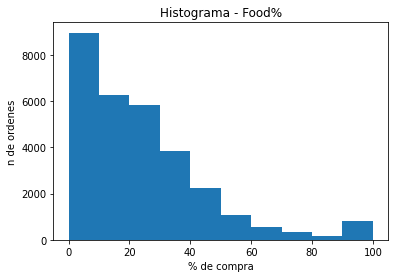

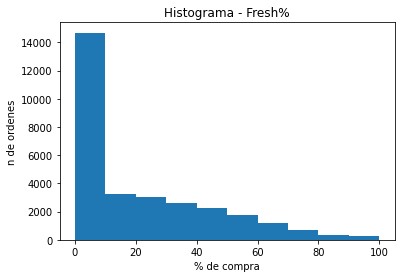

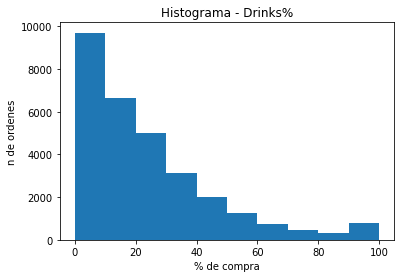

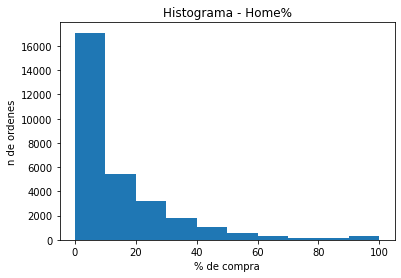

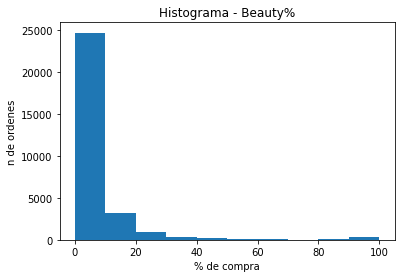

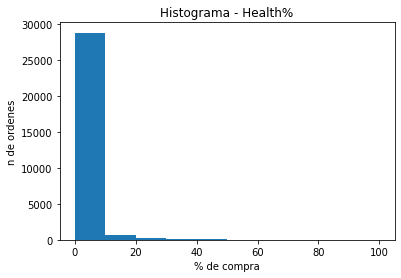

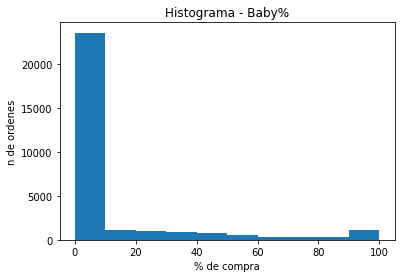

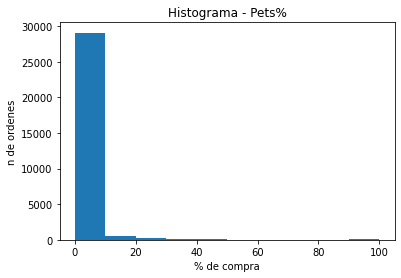

In [59]:
departments = ("Food%", "Fresh%", "Drinks%", "Home%", "Beauty%", "Health%", "Baby%", "Pets%")
for department in departments:
    plt.hist(df[[department]])
    plt.title(f"Histograma - {department}") 
    plt.ylabel("n de ordenes")
    plt.xlabel("% de compra")
    plt.show()

## Análisis del tiempo

#### Días de la semana (más ventas a menores ventas)
Se aprecía que el **lunes** es el día más ocupado. Mientras que por el otro lado, el sábado es el que menos ordenes tiene

In [60]:
df['weekday'].value_counts()

1    6237
7    5160
2    4970
3    4708
4    4081
5    2538
6    2306
Name: weekday, dtype: int64

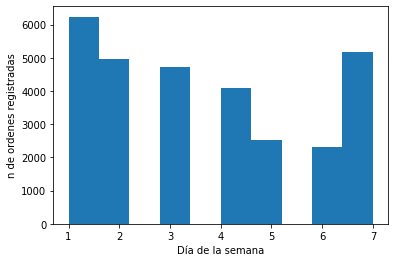

In [61]:
plt.hist(df[['weekday']])
plt.xlabel("Día de la semana")
plt.ylabel("n de ordenes registradas")
plt.show()

#### Horas del día (más ventas a menores ventas)
La mayoría de las ventas fueron hechas a las 10pm (22hrs), y a las 4am se tiene el menor número de ordenes

In [62]:
df['hour'].value_counts()

22    2491
21    2306
12    2211
11    2184
20    2040
10    2024
13    1983
23    1875
19    1775
18    1539
17    1455
9     1401
16    1281
15    1268
14    1222
8      926
0      926
7      358
1      310
6      125
2      119
3       76
5       57
4       48
Name: hour, dtype: int64

De igual manera se aprecia que en la madrugada se realizan muy pocas ordenes

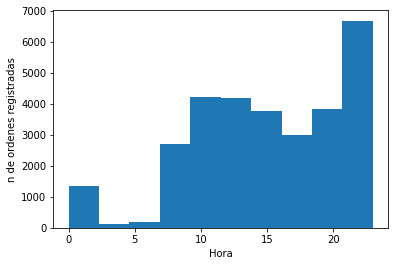

In [63]:
plt.hist(df[['hour']])
plt.xlabel("Hora")
plt.ylabel("n de ordenes registradas")
plt.show()

En el siguiente **heatmap** podemos ver los intervalos de tiempo con más ordenes

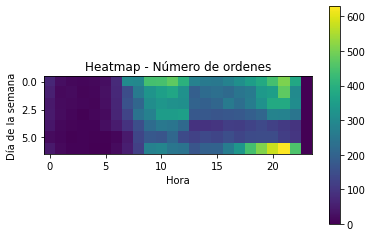

In [64]:
days = list(range(1,8))
hours = list(range(0,24))

filler = np.zeros((len(days), len(hours)))

for i in range(len(days)):
    for j in range(len(hours)):
        val = len(df.loc[(df['hour'] == j + 1) & (df['weekday'] == i + 1)])
        filler[i][j] = val

heatDF = pd.DataFrame(filler, columns=hours, index=days)

plt.ylabel("Día de la semana")
plt.xlabel("Hora")
plt.title("Heatmap - Número de ordenes")
heatmap = plt.imshow(heatDF)
plt.colorbar(heatmap);

In [67]:
# df['discount%'] = df['discount%'].abs()
total_items = (df.loc[(df['discount%'] >= 0)])['total_items'].tolist()
discount = (df.loc[(df['discount%'] >= 0)])['discount%'].tolist()

plt.scatter(total_items, discount)
plt.xlabel("Numero de items comprados")
plt.ylabel("% de descuento")
plt.show()

AttributeError: 'DataFrame' object has no attribute 'tolist'

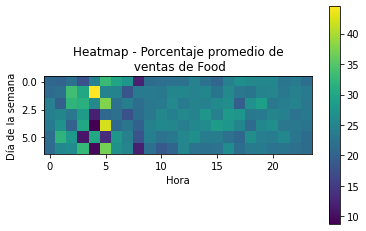

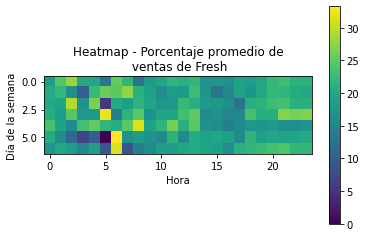

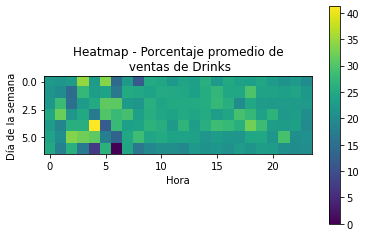

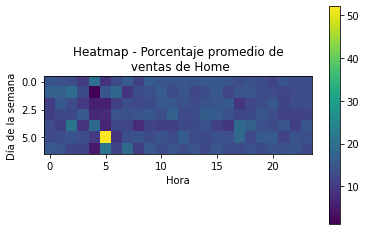

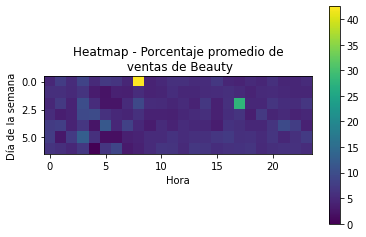

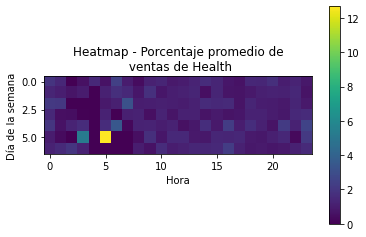

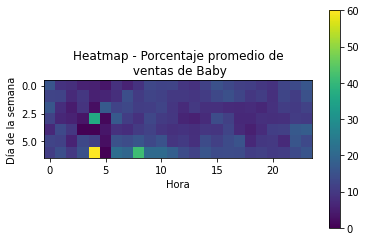

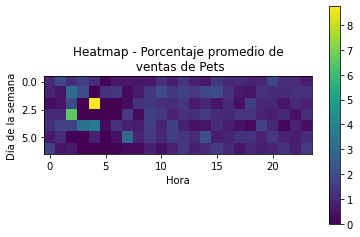

In [66]:
days = list(range(1,8))
hours = list(range(0,24))
departments = ("Food%", "Fresh%", "Drinks%", "Home%", "Beauty%", "Health%", "Baby%", "Pets%")
for department in departments:
    filler = np.zeros((len(days), len(hours)))

    for i in range(len(days)):
        for j in range(len(hours)):
            q = df.loc[(df['hour'] == j) & (df['weekday'] == i + 1)]
            data = q[department].tolist()
            avg = sum(data) / len(data)
            filler[i][j] = avg

    heatDF = pd.DataFrame(filler, columns=hours, index=days)

    plt.ylabel("Día de la semana")
    plt.xlabel("Hora")
    plt.title(f"Heatmap - Porcentaje promedio de\n ventas de {department[:-1]}")
    heatmap = plt.imshow(heatDF)
    plt.colorbar(heatmap)
    plt.show()